#Cleveland Pilot Data

Dataset is from 4/1-4/2 pilot in Cleveland

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('aggregate.csv')
df[['id','title','outcome','type','sender_race','sender_social_status','response_day','spam']].head()

,id,title,outcome,type,sender_race,sender_social_status,response_day,spam
0,4958836765,"1 bdrm available Free WATER,TRASH and SEWER!!!!",0,NaN,black,high,NaN,0
1,4920391484,Rent to Own **Westside** Great House,0,NaN,black,high,NaN,0
2,4958968006,Gorgeous 2 bedroom available soon!!,1,management,black,high,2015-04-02 00:00:00.00000,0
3,4958798736,"3 Bedroom 1.5 Bath Townhome Will Not Last, Com...",0,NaN,black,high,NaN,0
4,4926358064,Recently-Updated Home in Jefferson - Lots of R...,0,NaN,black,high,NaN,0


Determine how many emails per group were sent

In [3]:
df['group'] = df['sender_race'] + df['sender_social_status']
df['group'].value_counts()

whitehigh    60
whitelow     60
blackhigh    45
blacklow     45
dtype: int64

Responses were from both individuals and management companies

In [4]:
df['type'].value_counts()

person        42
management    34
dtype: int64

In [5]:
gb_race = df[['sender_race','outcome']].groupby(['sender_race'])
gb_status = df[['sender_social_status','outcome']].groupby(['sender_social_status'])
gb_group = df[['group','outcome']].groupby(['group'])

Response rates between whites and blacks were very similar

             Response Rate
sender_race               
black             0.355556
white             0.366667


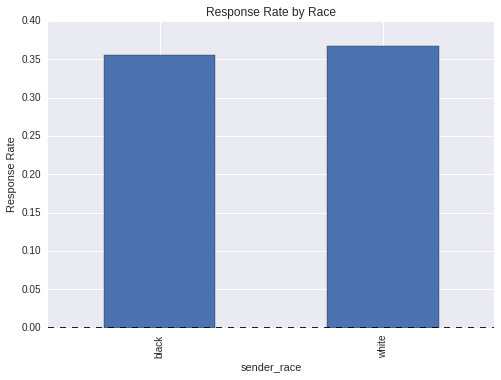

In [6]:
race_outcome = gb_race.mean()
race_outcome.columns = ['Response Rate']
print race_outcome

gb_race.mean().plot(kind='bar', legend=False)
plt.title('Response Rate by Race')
plt.ylabel('Response Rate');

Response rates between high and low social status were identical

                      Response Rate
sender_social_status               
high                       0.361905
low                        0.361905


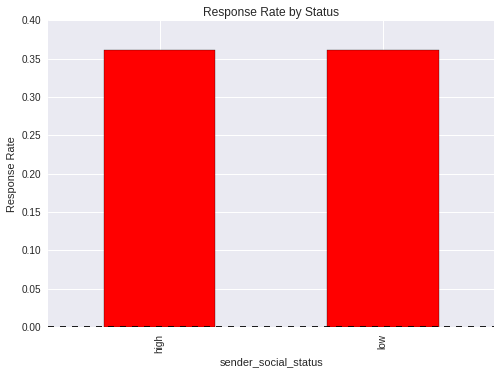

In [7]:
status_outcome = gb_status.mean()
status_outcome.columns = ['Response Rate']
print status_outcome

gb_status.mean().plot(kind='bar', legend=False, color='r')
plt.title('Response Rate by Status')
plt.ylabel('Response Rate');

Response rates between the groups did vary

           Response Rate
group                   
blackhigh       0.311111
blacklow        0.400000
whitehigh       0.400000
whitelow        0.333333


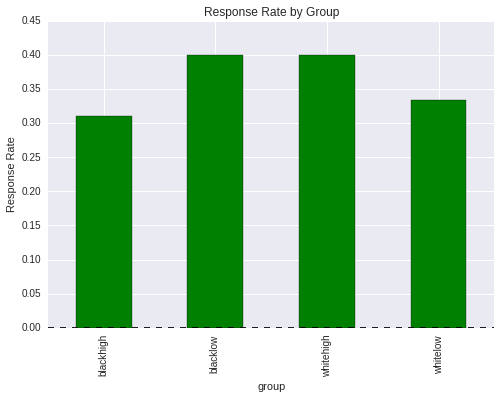

In [8]:
group_outcome = gb_group.mean()
group_outcome.columns = ['Response Rate']
print group_outcome

gb_group.mean().plot(kind='bar', legend=False, color = 'g')
plt.title('Response Rate by Group')
plt.ylabel('Response Rate');

#Takeways

* Several management companies were sent multiple emails over the two days.  
* One company received an email from all four email addresses. One individual received two emails.
* One person acknowledged they were being spammed
* Most people responded within 1-2 days
* Many of the management companies cannot be determined a priori (they use the anonymous email)
* There are posts with more than 1 bedroom in the data

In [11]:
df.pivot_table(index='sender_race',columns = 'sender_social_status', values='outcome')

sender_social_status,high,low
sender_race,,
black,0.311111,0.400000
white,0.400000,0.333333
